In [ ]:
!pip install discopy
!pip install sympy
!pip install jax
!pip install noisyopt

In [18]:
import jax.numpy as jnp
from jax import jit
from discopy import Tensor
Tensor.np = tnp
from discopy.quantum import *

from discopy import *
from discopy.quantum import *
from discopy.grammar import draw

import discopy
import numpy as np

In [32]:
nouns = ['He', 'She']
verbs = ['is', 'is not']
adj = ['cool', 'nice']

sentences = []

for i in range(2):
  sentences.append(nouns[i] + ' ' + verbs[i] + ' '+ adj[i])

In [33]:
sentences

['He is cool', 'She is not nice']

In [37]:
s, n = Ty('s'), Ty('n')

dict_w = {}

for i in range(len(sentences)):
  try:
    dict_w['noun'].append(Word(nouns[i], n))
    dict_w['adj'].append(Word(adj[i], n))
    dict_w['verb'].append(Word(verbs[i],  n.r @ s @ n.l))

  except: 
    dict_w['noun'] = [Word(nouns[i], n)]
    dict_w['adj'] = [Word(adj[i], n)]
    dict_w['verb'] = [Word(verbs[i],  n.r @ s @ n.l)]

grammar = Cup(n, n.r) @ Id(s) @ Cup(n.l, n)
parsing = {"{} {} {}.".format(subj, verb, obj): subj @ verb @ obj >> grammar
            for subj in dict_w['noun'] for verb in dict_w['verb'] for obj in dict_w['adj']}


He is cool':


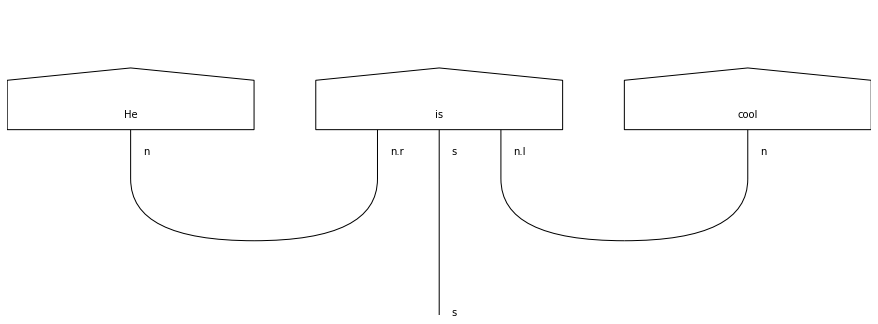

Grammatical sentences:
He is cool.
He is nice.
He is not cool.
He is not nice.
She is cool.
She is nice.
She is not cool.
She is not nice.
Tensor(dom=Dim(1), cod=Dim(2, 2), array=[0.99999994+0.j, 0.    +0.j, 0.    +0.j, 0.99999994+0.j])


In [40]:
diagram = parsing['He is cool.']
print("He is cool':")
draw(diagram, draw_type_labels=True)


sentences = list(parsing.keys())
print("Grammatical sentences:\n{}".format('\n'.join(sentences)))


def verb_ansatz(phase):
    return Ket(0, 0) >> H @ sqrt(2) @ Rx(phase) >> CX

print(verb_ansatz(0).eval())

In [152]:
circ1 = Circuit(
    dom=Ty(),
    cod=qubit,
    boxes=[
        Ket(0),
        Rx(0.1),
        Rz(0.2),
        Rx(0.3),
        Ket(0, 0, 0),
        H,
        H,
        H,
        CRz(0.2),
        CRz(0.3),
        H,
        H,
        H,
        CRz(0.2),
        CRz(0.4),
        Ket(0),
        Rx(0.3),
        Rz(0.1),
        Rx(0.2),
        CX,
        H,
        sqrt(2),
        Bra(0, 0),
        CX,
        H,
        sqrt(2),
        Bra(0, 0)],
    offsets=[0, 0, 0, 0, 1, 1, 2, 3, 1, 2, 1, 2, 3, 1, 2, 4, 4, 4, 4, 0, 0, 1, 0, 1, 1, 2, 1]
)

circ2 = Circuit(
    dom=Ty(),
    cod=qubit,
    boxes=[
        Ket(0),
        Rx(0.2),
        Rz(0.3),
        Rx(0.3),
        Ket(0, 0, 0),
        H,
        H,
        H,
        CRz(0.2),
        CRz(0.1),
        H,
        H,
        H,
        CRz(0.2),
        CRz(0.5),
        Ket(0),
        Rx(0.3),
        Rz(0.2),
        Rx(0.3),
        CX,
        H,
        sqrt(2),
        Bra(0, 0),
        CX,
        H,
        sqrt(2),
        Bra(0, 0)],
    offsets=[0, 0, 0, 0, 1, 1, 2, 3, 1, 2, 1, 2, 3, 1, 2, 4, 4, 4, 4, 0, 0, 1, 0, 1, 1, 2, 1]
)

circ3 = Circuit(
    dom=Ty(),
    cod=qubit,
    boxes=[
        Ket(0),
        Rx(0.4),
        Rz(0.2),
        Rx(0.4),
        Ket(0, 0, 0),
        H,
        H,
        H,
        CRz(0.2),
        CRz(0.3),
        H,
        H,
        H,
        CRz(0.3),
        CRz(0.4),
        Ket(0),
        Rx(0.3),
        Rz(0.2),
        Rx(0.2),
        CX,
        H,
        sqrt(2),
        Bra(0, 0),
        CX,
        H,
        sqrt(2),
        Bra(0, 0)],
    offsets=[0, 0, 0, 0, 1, 1, 2, 3, 1, 2, 1, 2, 3, 1, 2, 4, 4, 4, 4, 0, 0, 1, 0, 1, 1, 2, 1]
)

circ4 = Circuit(
    dom=Ty(),
    cod=qubit,
    boxes=[
        Ket(0),
        Rx(0.3),
        Rz(0.2),
        Rx(0.3),
        Ket(0, 0, 0),
        H,
        H,
        H,
        CRz(0.2),
        CRz(0.3),
        H,
        H,
        H,
        CRz(0.2),
        CRz(0.4),
        Ket(0),
        Rx(0.2),
        Rz(0.1),
        Rx(0.1),
        CX,
        H,
        sqrt(2),
        Bra(0, 0),
        CX,
        H,
        sqrt(2),
        Bra(0, 0)],
    offsets=[0, 0, 0, 0, 1, 1, 2, 3, 1, 2, 1, 2, 3, 1, 2, 4, 4, 4, 4, 0, 0, 1, 0, 1, 1, 2, 1]
)

circ5 = Circuit(
    dom=Ty(),
    cod=qubit,
    boxes=[
        Ket(0),
        Rx(0.2),
        Rz(0.2),
        Rx(0.3),
        Ket(0, 0, 0),
        H,
        H,
        H,
        CRz(0.2),
        CRz(0.3),
        H,
        H,
        H,
        CRz(0.2),
        CRz(0.5),
        Ket(0),
        Rx(0.3),
        Rz(0.2),
        Rx(0.2),
        CX,
        H,
        sqrt(2),
        Bra(0, 0),
        CX,
        H,
        sqrt(2),
        Bra(0, 0)],
    offsets=[0, 0, 0, 0, 1, 1, 2, 3, 1, 2, 1, 2, 3, 1, 2, 4, 4, 4, 4, 0, 0, 1, 0, 1, 1, 2, 1]
)



In [156]:
corpus = {'He is cool.': circ1.measure(),
          'He is nice.': circ2.measure(),
          'He is not cool.': circ3.measure(),
          'He is not nice.':circ4.measure(),
          'She is cool.': circ5.measure(),
          'She is nice.':circ1.measure(),
          'She is not nice.':circ3.measure(),
          'She is not cool.':circ4.measure()
}

####sentence: probability of Spam######

corpus

{'He is cool.': DeviceArray([0.0410303 , 0.02291863], dtype=float32),
 'He is nice.': DeviceArray([0.2492585 , 0.01322172], dtype=float32),
 'He is not cool.': DeviceArray([0.3010729, 0.2034327], dtype=float32),
 'He is not nice.': DeviceArray([0.03834721, 0.07802396], dtype=float32),
 'She is cool.': DeviceArray([0.10080971, 0.04134114], dtype=float32),
 'She is nice.': DeviceArray([0.0410303 , 0.02291863], dtype=float32),
 'She is not cool.': DeviceArray([0.03834721, 0.07802396], dtype=float32),
 'She is not nice.': DeviceArray([0.3010729, 0.2034327], dtype=float32)}

In [158]:
def mean_squared(y_true, y_pred):
    return np.mean((np.array(y_true) - np.array(y_pred)) ** 2)


from sklearn.model_selection import train_test_split

sentence_train, sentence_test = train_test_split(sentences, test_size=0.25, random_state=42)

print("Training set:\n{}\n".format('\n'.join(sentence_train)))
print("Testing set:\n{}".format('\n'.join(map(
    lambda x: 'Does ' + x.replace('loves', 'love').replace('.', '?'), sentence_test))))


Training set:
He is cool.
She is not nice.
He is not cool.
She is cool.
He is not nice.
She is not cool.

Testing set:
Does He is nice?
Does She is nice?


In [160]:
from time import time

loss = {sentence: lambda params: mean_squared(corpus[sentence], evaluate(F(params), sentence))
                 for sentence in sentences}

{'He is cool.': <function __main__.<dictcomp>.<lambda>>,
 'He is nice.': <function __main__.<dictcomp>.<lambda>>,
 'He is not cool.': <function __main__.<dictcomp>.<lambda>>,
 'He is not nice.': <function __main__.<dictcomp>.<lambda>>,
 'She is cool.': <function __main__.<dictcomp>.<lambda>>,
 'She is nice.': <function __main__.<dictcomp>.<lambda>>,
 'She is not cool.': <function __main__.<dictcomp>.<lambda>>,
 'She is not nice.': <function __main__.<dictcomp>.<lambda>>}